In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time




In [83]:

# np.random.seed(1234)
stream_size = 1000
noise_var = 0.00
hyperplane_dimension = 10
drift_probability = 0.00

stream = []
# initialize and normalize w
w = np.random.normal(0,scale=1,size=hyperplane_dimension)
w = w / np.linalg.norm(w)
for k in range(stream_size):
    if np.random.uniform() < drift_probability and drift_probability != -1:
        w = np.random.normal(0, scale=1, size=hyperplane_dimension)
        w = w / np.linalg.norm(w)
    if drift_probability == -1 and k == int(stream_size/2):
        w = w / np.linalg.norm(w)
        w = np.random.normal(0, scale=1, size=hyperplane_dimension)
    # draw uniform random samples 
    X = np.random.uniform(-10, 10, hyperplane_dimension)
    # create the target parameter using the features
    y = np.dot(X,w)
    # make the stream noisy
    y = y + np.random.normal(0, noise_var)
    stream.append([X, y, w])

In [177]:
# train a RF regressor on the stream using sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

X = np.array([x[0] for x in stream])
y = np.array([x[1] for x in stream])

# normalize the data
X_ = (X - X.mean(axis=0)) / X.std(axis=0)
y_ = (y - y.mean()) / y.std()

X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.33, random_state=42)

y_test = y_test * y.std() + y.mean()

rf = RandomForestRegressor(n_estimators=10, 
                        #    max_depth=10, 
                           n_jobs=-1, 
                        #    oob_score=True,
                        #    bootstrap=True,
                           )

%time rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
# scale back the predictions
y_pred = y_pred * y.std() + y.mean()
print('RF: ', mean_absolute_error(y_test, y_pred))


# nn = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=0)
# %time nn.fit(X_train, y_train)
# y_pred = nn.predict(X_test)
# y_pred = y_pred * y.std() + y.mean()
# print('NN:', mean_absolute_error(y_test, y_pred))


# dt = DecisionTreeRegressor(max_depth=5)
# %time dt.fit(X_train, y_train)
# y_pred = dt.predict(X_test)
# y_pred = y_pred * y.std() + y.mean()
# print('DT:', mean_absolute_error(y_test, y_pred))

# svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
# %time svr.fit(X_train, y_train) 
# y_pred = svr.predict(X_test)
# y_pred = y_pred * y.std() + y.mean()
# print('SVR:', mean_absolute_error(y_test, y_pred))

# gpr = GaussianProcessRegressor(kernel='RBF')
# %time gpr.fit(X_train, y_train)
# y_pred = gpr.predict(X_test)
# y_pred = y_pred * y.std() + y.mean()
# print('GPR:', mean_absolute_error(y_test, y_pred))

print('std y values:', np.std(y))


CPU times: user 61.4 ms, sys: 4.11 ms, total: 65.5 ms
Wall time: 31.1 ms
RF:  1.8819798062261166
std y values: 5.618832171280289


In [44]:
print('std y values:', np.std(y))

std y values: 5.803325520336112


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

%matplotlib qt
plt.close('all')

# Load the CSV file
file_path = 'msmsa_avars.csv'
data = pd.read_csv(file_path)

# Create a figure and axis for plotting
fig, ax = plt.subplots()

# Iterate over each row in the dataframe
for index, row in data.iterrows():
    # Clear the previous plot
    ax.clear()
    
    # Get the valid data (ignoring NaN values)
    valid_data = row.dropna().values
    
    # Only plot if there is valid data
    if len(valid_data) > 0:
        ax.plot(valid_data)
    
    # Draw the plot
    plt.draw()
    plt.grid()
    # plt.xlim(0, 500)
    # plt.ylim(0, 0.01)
    plt.title(f'Row {index}')
    plt.pause(0.02)  # Pause for 0.1 seconds before the next plot

# Close the plot window
plt.close()

KeyboardInterrupt: 

C:\Users\Hossein_Haeri\AppData\Local\Temp\ipykernel_19076\2443378297.py:43: UserWarning: Glyph 108 (l) missing from current font.
  plt.tight_layout()
C:\Users\Hossein_Haeri\AppData\Local\Temp\ipykernel_19076\2443378297.py:43: UserWarning: Glyph 112 (p) missing from current font.
  plt.tight_layout()
C:\Users\Hossein_Haeri\AppData\Local\Temp\ipykernel_19076\2443378297.py:43: UserWarning: Glyph 83 (S) missing from current font.
  plt.tight_layout()
C:\Users\Hossein_Haeri\AppData\Local\Temp\ipykernel_19076\2443378297.py:43: UserWarning: Glyph 97 (a) missing from current font.
  plt.tight_layout()
C:\Users\Hossein_Haeri\AppData\Local\Temp\ipykernel_19076\2443378297.py:43: UserWarning: Glyph 109 (m) missing from current font.
  plt.tight_layout()
C:\Users\Hossein_Haeri\AppData\Local\Temp\ipykernel_19076\2443378297.py:43: UserWarning: Glyph 101 (e) missing from current font.
  plt.tight_layout()
C:\Users\Hossein_Haeri\AppData\Local\Temp\ipykernel_19076\2443378297.py:43: UserWarning: Glyph 3

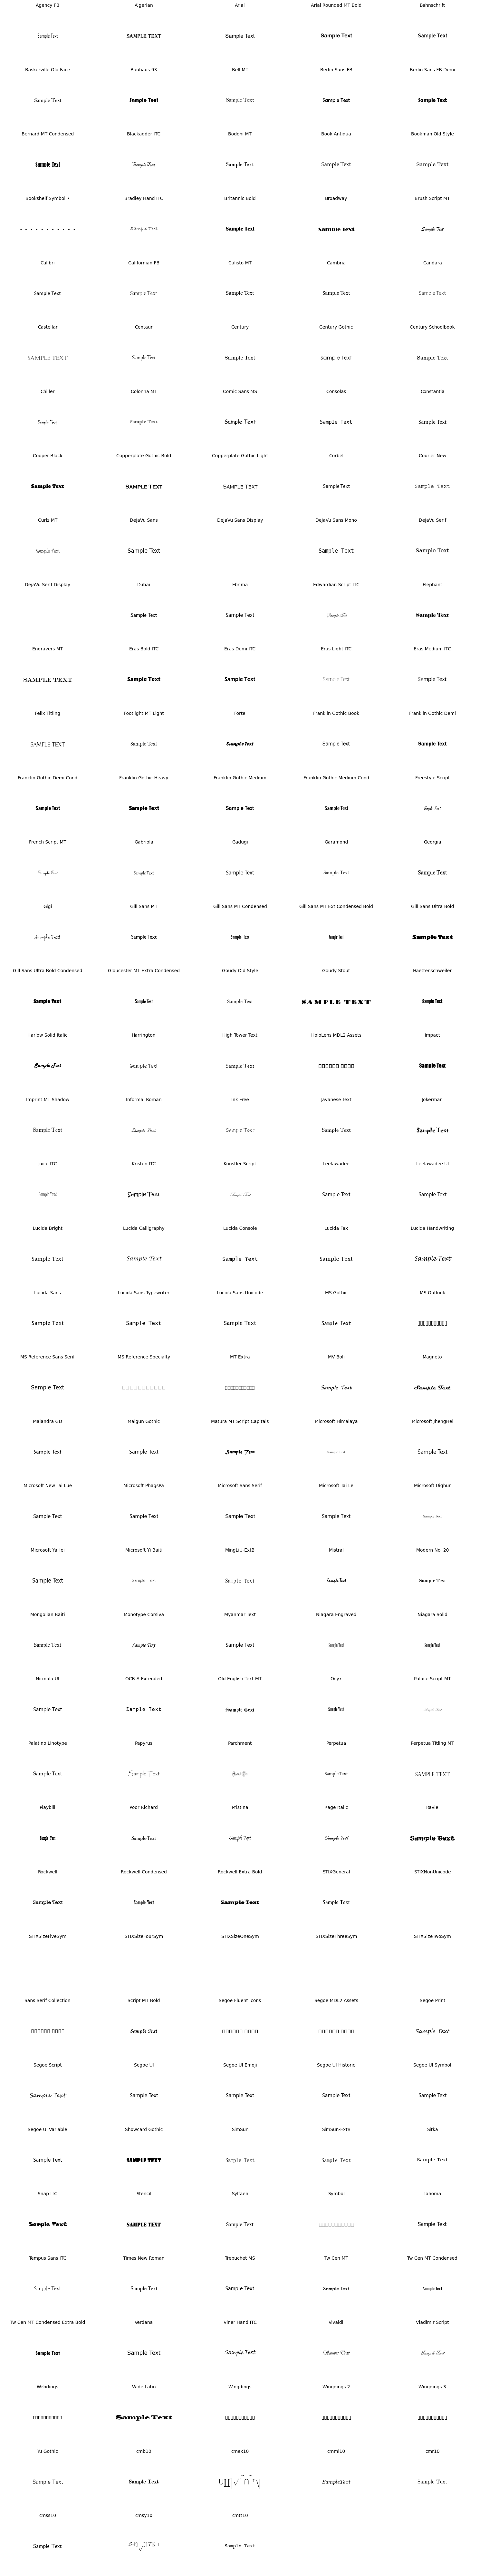

In [1]:
# Visualizing Fonts in Matplotlib

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# Retrieve the list of available fonts
available_fonts = sorted([f.name for f in fm.fontManager.ttflist])

# Unique font families
unique_fonts = sorted(set(available_fonts))

# Number of fonts to display
num_fonts = len(unique_fonts)

# Calculate number of rows needed for visualization
num_cols = 5
num_rows = np.ceil(num_fonts / num_cols).astype(int)

# Create a figure to display fonts
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 2))

# Flatten axes array for easy indexing
axes = axes.flatten()

# Plot each font
for i, font in enumerate(unique_fonts):
    # Use a try-except block in case some fonts fail
    try:
        axes[i].text(0.5, 0.5, 'Sample Text', fontname=font, ha='center', va='center', fontsize=12)
        axes[i].set_title(font, fontsize=10)
        axes[i].axis('off')
    except:
        # Print error message
        print(f"Font '{font}' could not be rendered and will be skipped.")
        axes[i].axis('off')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()
